# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [2]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

2 clusters average silhouette score:0.5027144446956527
3 clusters average silhouette score:0.6105565451092732
4 clusters average silhouette score:0.6270122040179333
5 clusters average silhouette score:0.6115749260799671
6 clusters average silhouette score:0.5499388428924794
7 clusters average silhouette score:0.4695416652197068
8 clusters average silhouette score:0.4231800504179843


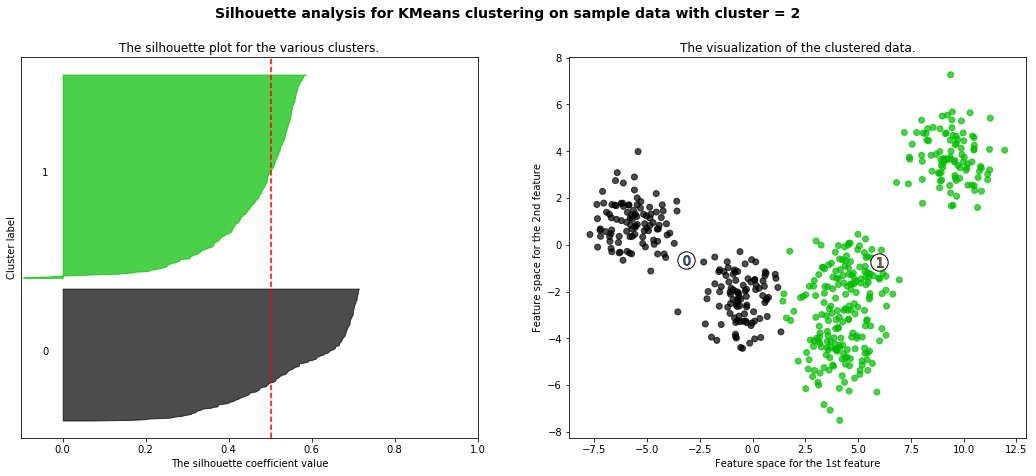

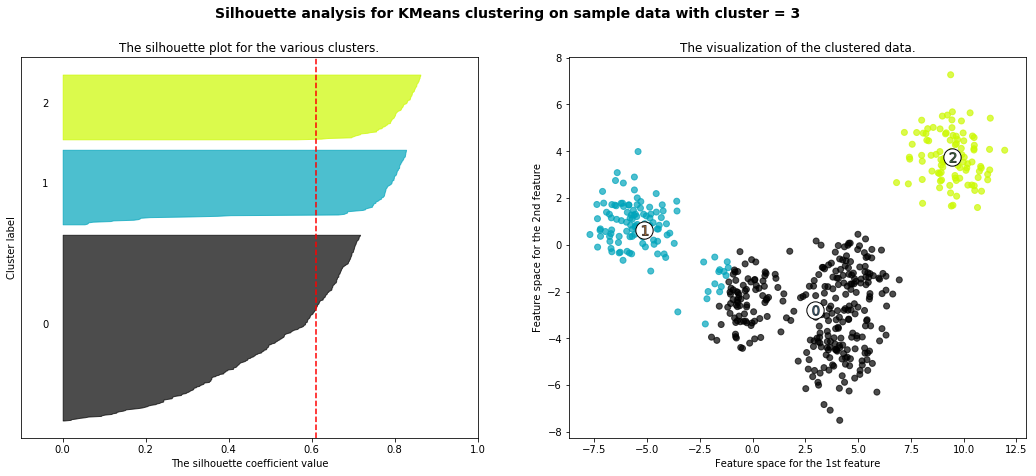

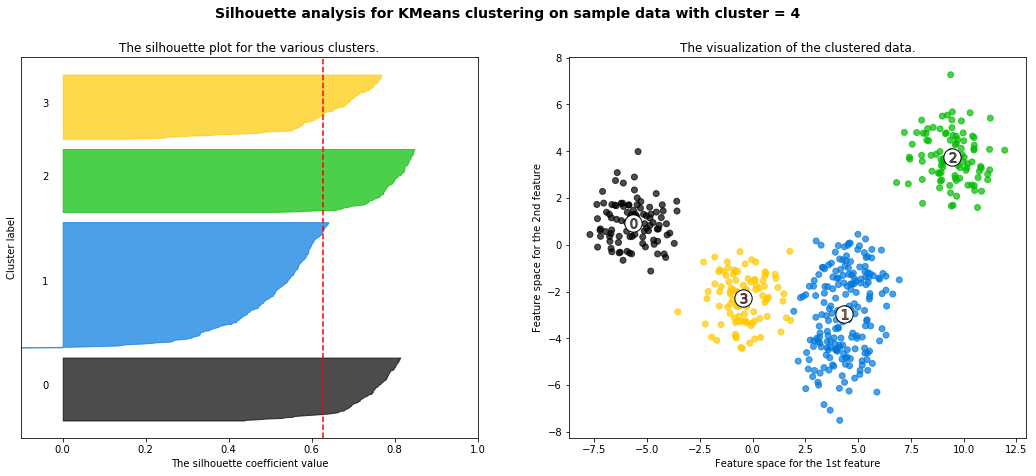

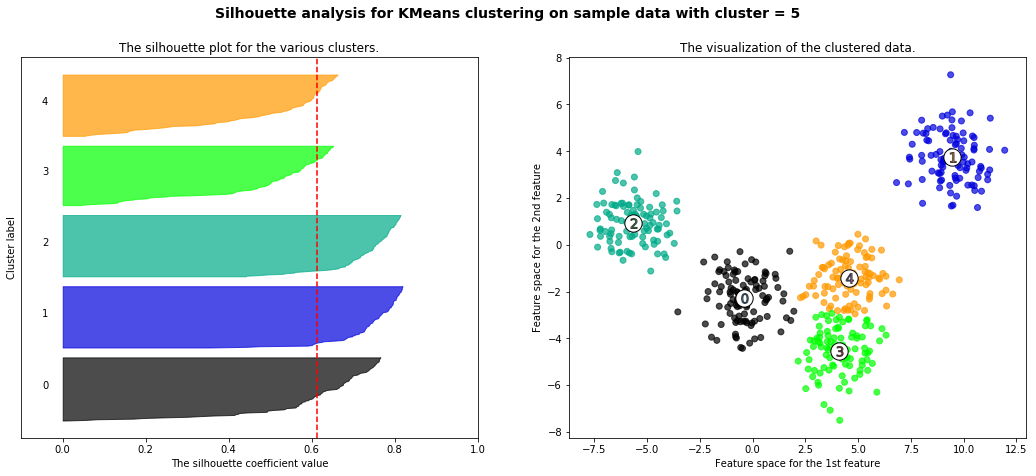

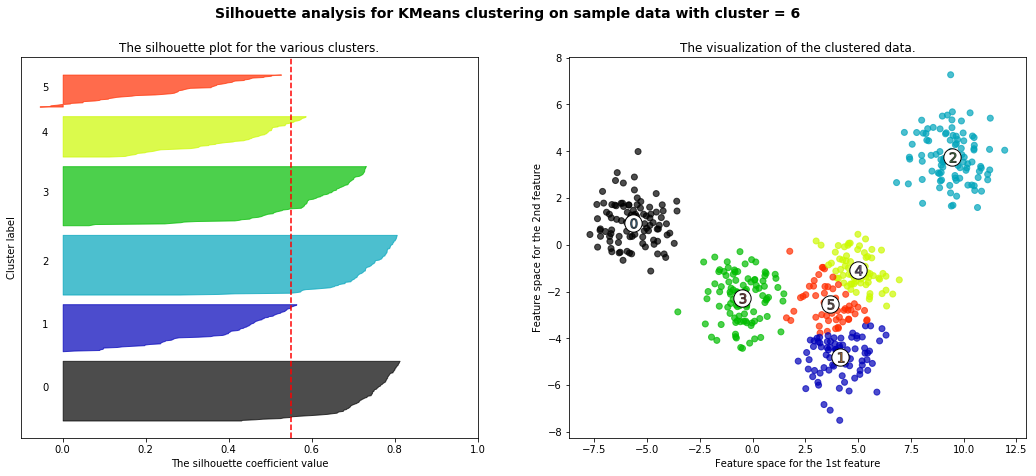

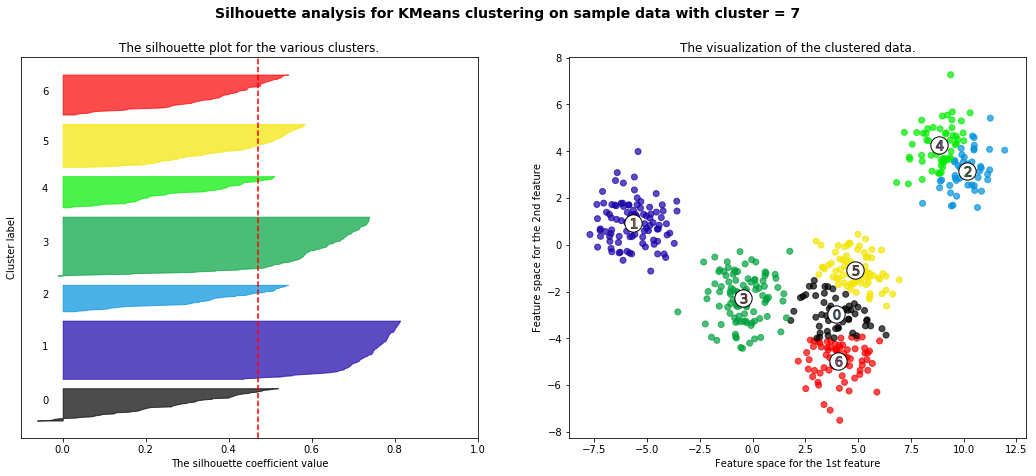

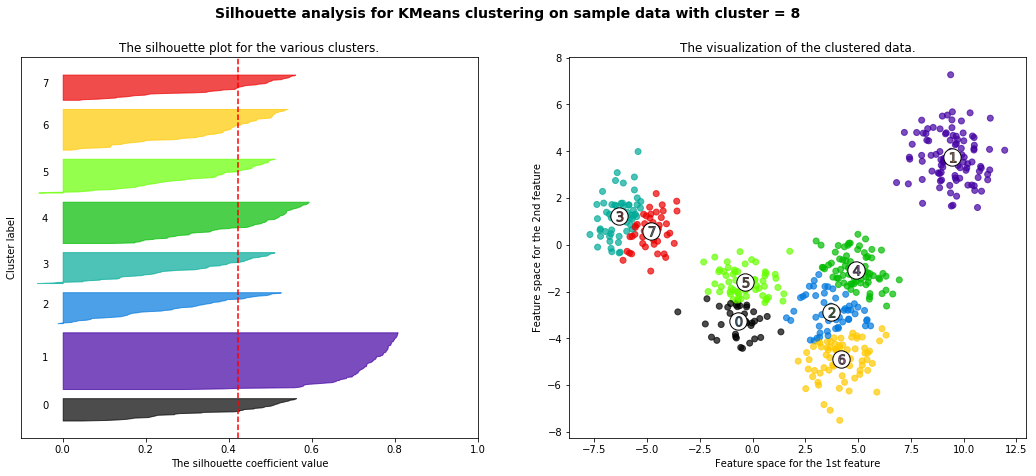

In [3]:
# 計算並繪製輪廓分析的結果
lower = 10
for cluster in range_n_clusters:
    model = KMeans(n_clusters=cluster, random_state=10)
    predict_label = model.fit_predict(X)
    avg_si = silhouette_score(X, predict_label)
    print(f'%i clusters average silhouette score:{avg_si}' %cluster)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    
    for i in range(cluster):
        sil_value = silhouette_samples(X, predict_label)[predict_label==i]
        sil_value.sort()
        
        size_sil = sil_value.shape[0]
        upper = lower + size_sil
        color = cm.nipy_spectral(float(i) / cluster)
        ax1.fill_betweenx(np.arange(lower, upper), sil_value, alpha=0.7, color=color)
        ax1.text(-0.05, lower + 0.5 * size_sil, str(i))
        lower = upper + 15     
    
    ax1.axvline(avg_si, color='r', linestyle='--')
    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel("The silhouette coefficient value")
    ax1.set_ylabel("Cluster label")
    ax1.set_yticks([])
    
    # 處理右圖(呈現資料散佈圖，並將其分群標示)
    colors = cm.nipy_spectral(predict_label.astype('float64') / cluster)
    ax2.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7)
    
    
    # 標記分群編號
    center = model.cluster_centers_
    ax2.scatter(center[:, 0], center[:, 1], marker='o',
                c="white", alpha=1, s=300, edgecolor='k')
    for i, c in enumerate(center):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, s=100, edgecolor='k', alpha=0.7)
       
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with cluster = %d" % cluster),
                 fontsize=14, fontweight='bold')
    
plt.show()

### matplotlib (fill_betweenx)
***
- plt.fill_betweenx(y, x1):
    1. y:以資料筆數依序呈現
    2. x:資料數值
    3. 函數會依照y有幾筆資料，依序對應x數值
        ex: 假設有10筆資料，y=[0, 1, 2, 3, ..., 9], x=[0, 0.1, 0.2, 0.3, ..., 0.9]
            則 y=[0,  x=[0.0,
                  1,     0.1,
                  2,     0.2,
                  3,     0.3,
                      .
                      .
                      .
                  9]     0.9]

### colormap (nipy_spectral)
***
- cm.nipy_spectral(x):給定一個x值，函數會查表其值對應的色彩表
- 色彩表產出的值不是RGB三維數值
        ex:
            >>>color = cm.nipy_spectral(float(1) / 2)
            >>>color
            (0.0, 0.7385313725490196, 0.0, 1.0)